# Plotting Temperature Data for Sagehen

### Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 

### Importing First Set of Data

In [8]:
may_jul_18 = pd.read_csv('data/SGH_HOBO_496_5:19:18-7:23:18.csv', skiprows=1, index_col='#')
may_jul_18.head()

,"Date Time, GMT-07:00","Temp, °F (LGR S/N: 11016153, SEN S/N: 11016153, LBL: sgh 496 temp)","RH, % (LGR S/N: 11016153, SEN S/N: 11016153, LBL: sgh 496 rh)",Coupler Detached (LGR S/N: 11016153),Coupler Attached (LGR S/N: 11016153),Stopped (LGR S/N: 11016153),End Of File (LGR S/N: 11016153)
#,,,,,,,
1,05/19/18 12:00:00 AM,37.846,95.801,Logged,NaN,NaN,NaN
2,05/19/18 12:20:00 AM,37.179,95.700,NaN,NaN,NaN,NaN
3,05/19/18 12:40:00 AM,36.505,95.743,NaN,NaN,NaN,NaN
4,05/19/18 01:00:00 AM,35.879,95.939,NaN,NaN,NaN,NaN
5,05/19/18 01:20:00 AM,35.346,95.954,NaN,NaN,NaN,NaN


### Importing, Merging, Cleaning, and Saving All Data for Logger #496

In [9]:
# Importing all data
may_jul_18 = pd.read_csv('data/SGH_HOBO_496_5:19:18-7:23:18.csv', skiprows=1, index_col='#')
jul_oct_18 = pd.read_csv('data/SGH_HOBO_496_7:23:18-10:26:18.csv', skiprows=1, index_col='#')
oct_dec_18 = pd.read_csv('data/SGH_HOBO_496_10:26:18-12:10:18.csv', skiprows=1, index_col='#')
dec_jun_19 = pd.read_csv('data/SGH_HOBO_496_12:10:18-6:10:19.csv', skiprows=1, index_col='#')
jun_sep_19 = pd.read_csv('data/SGH_HOBO_496_6:10:19-9:3:19.csv', skiprows=1, index_col='#')
sep_nov_19 = pd.read_csv('data/SGH_HOBO_496_9:3:19-11:5:19.csv', skiprows=1, index_col='#')
nov_feb_20 = pd.read_csv('data/SGH_HOBO_496_11:5:19-2:13:20.csv', skiprows=1, index_col='#')
feb_aug_20 = pd.read_csv('data/SGH_HOBO_496_2:13:20-8:13:20.csv', skiprows=1, index_col='#')

# Merging all data
complete = pd.concat([may_jul_18, jul_oct_18, oct_dec_18, dec_jun_19, jun_sep_19, sep_nov_19, nov_feb_20, feb_aug_20])

# Renaming columns to be more friendly
complete.rename({'Date Time, GMT-07:00': 'DT',
                'Temp, °F (LGR S/N: 11016153, SEN S/N: 11016153, LBL: sgh 496 temp)': 'Temperature (F)',
                'RH, % (LGR S/N: 11016153, SEN S/N: 11016153, LBL: sgh 496 rh)': 'RH (%)',
                'Coupler Detached (LGR S/N: 11016153)': 'Coupler Detached',
                'Coupler Attached (LGR S/N: 11016153)': 'Coupler Attached',
                'Stopped (LGR S/N: 11016153)': 'Stopped',
                'End Of File (LGR S/N: 11016153)': 'End of File'},
                axis=1, inplace=True)

# Converting Date column to Datetime Object for easier manipulation
complete['DT'] = pd.to_datetime(complete['DT'])

# Dropping two temperature recordings from November 24th 2018 because they read 
# 153.1 and 250.3 degrees F at 7:20am and 7:40am, respectively
complete = complete.loc[complete['Temperature (F)'] < 150, :]

# Saving complete data to data folder
complete.to_csv('data/496_All.csv')

complete

,DT,Temperature (F),RH (%),Coupler Detached,Coupler Attached,Stopped,End of File
#,,,,,,,
1,2018-05-19 00:00:00,37.846,95.801,Logged,NaN,NaN,NaN
2,2018-05-19 00:20:00,37.179,95.700,NaN,NaN,NaN,NaN
3,2018-05-19 00:40:00,36.505,95.743,NaN,NaN,NaN,NaN
4,2018-05-19 01:00:00,35.879,95.939,NaN,NaN,NaN,NaN
5,2018-05-19 01:20:00,35.346,95.954,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
13089,2020-08-13 08:20:00,48.938,72.942,NaN,NaN,NaN,NaN
13090,2020-08-13 08:40:00,54.777,52.624,NaN,NaN,NaN,NaN
13091,2020-08-13 09:00:00,58.325,48.375,NaN,NaN,NaN,NaN


### Preliminary Plotting

Text(0.5, 1.0, 'Temperature on May 19th, 2018')

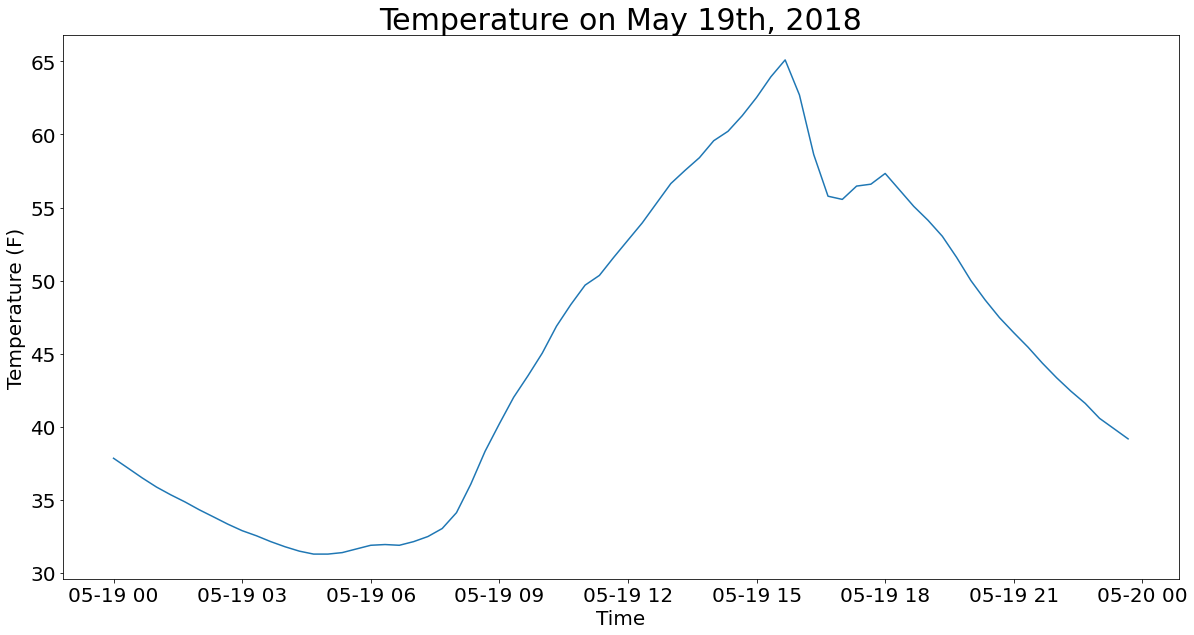

In [5]:
# Plotting Example of Temperature on May 19th 2018
plt.figure(figsize=(20, 10))
plt.plot(complete['DT'].iloc[:72], complete['Temperature (F)'].iloc[:72])
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Time', size=20)
plt.ylabel('Temperature (F)', size=20)
plt.title('Temperature on May 19th, 2018', size=30)

Text(0.5, 1.0, 'Full Temperature Plot (Messy)')

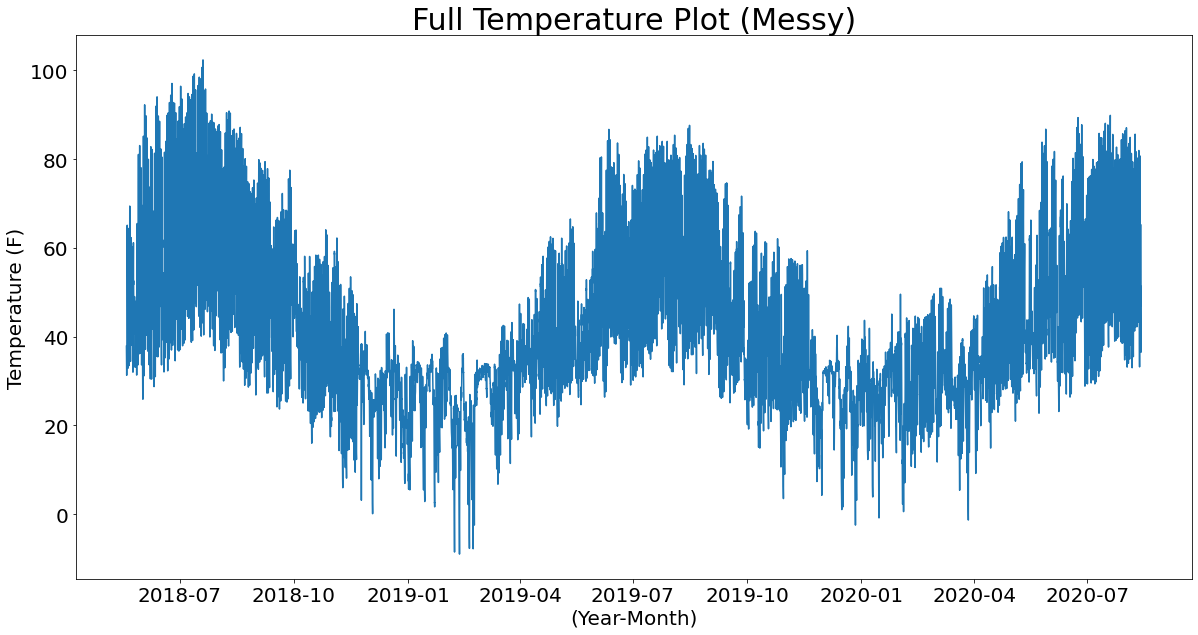

In [6]:
# Plotting Full Temperature Lineplot
plt.figure(figsize=(20, 10))
plt.plot(complete['DT'], complete['Temperature (F)'])
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('(Year-Month)', size=20)
plt.ylabel('Temperature (F)', size=20)
plt.title('Full Temperature Plot (Messy)', size=30)

Text(0.5, 1.0, 'Full Temperature Plot (Messy)')

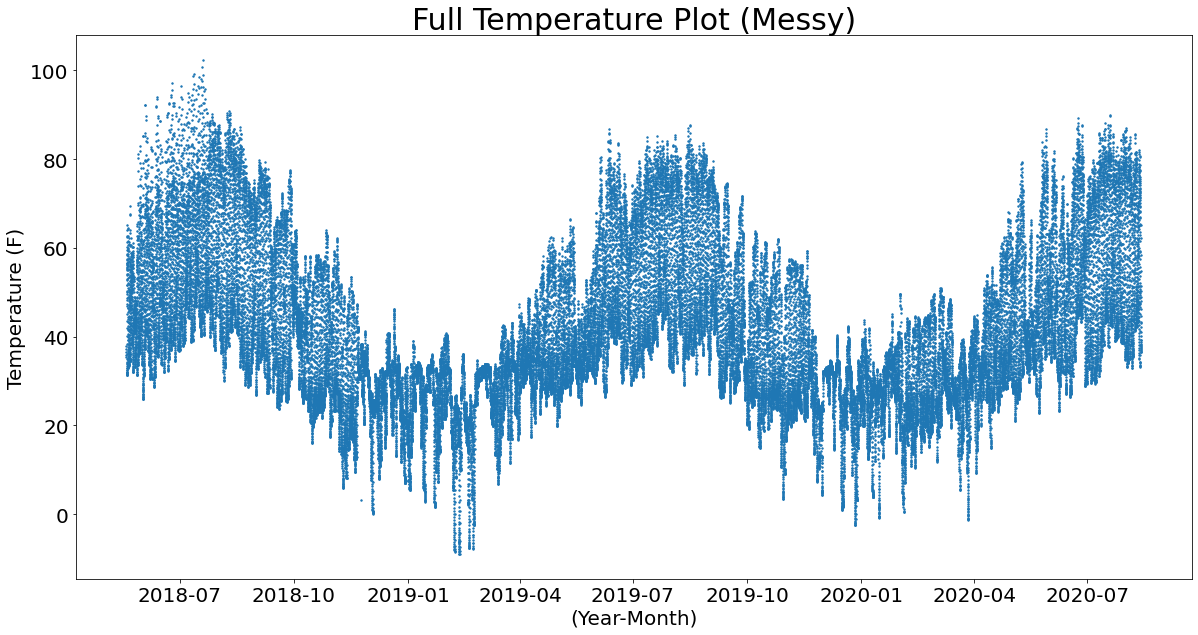

In [7]:
# Plotting Full Temperature Scatterplot
plt.figure(figsize=(20, 10))
plt.scatter(complete['DT'], complete['Temperature (F)'], s=2)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('(Year-Month)', size=20)
plt.ylabel('Temperature (F)', size=20)
plt.title('Full Temperature Plot (Messy)', size=30)

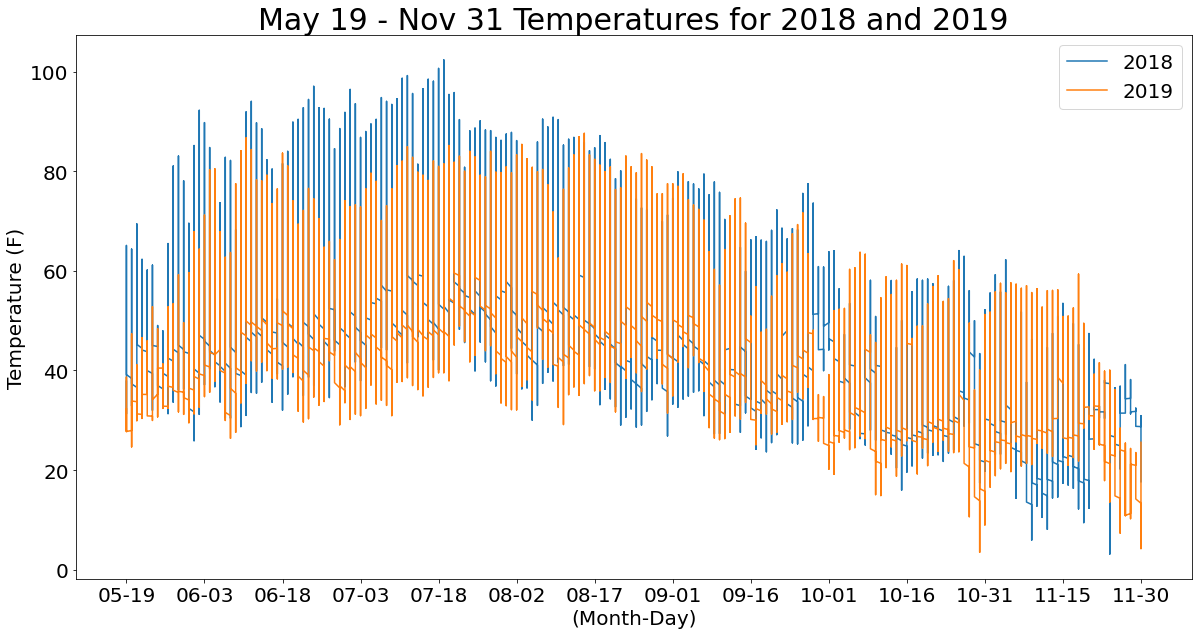

In [8]:
# Selecting all data from May 19th - Nov 31st in 2018
may_nov_2018 = complete.loc[(complete['DT'].dt.strftime('%y-%m-%d') >= '18-05-19') & (complete['DT'].dt.strftime('%y-%m-%d') <= '18-11-31')]

# Selecting all data from May 19th - Nov 31st in 2019
may_nov_2019 = complete.loc[(complete['DT'].dt.strftime('%y-%m-%d') >= '19-05-19') & (complete['DT'].dt.strftime('%y-%m-%d') <= '19-11-31')]

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(may_nov_2018['DT'].dt.strftime('%m-%d'), may_nov_2018['Temperature (F)'], label='2018')
ax.plot(may_nov_2019['DT'].dt.strftime('%m-%d'), may_nov_2019['Temperature (F)'], label='2019')
ax.legend(prop={'size': 20})
ax.set_title('May 19 - Nov 31 Temperatures for 2018 and 2019', size=30)
ax.set_xlabel('(Month-Day)', size=20)
ax.set_ylabel('Temperature (F)', size=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
plt.show()

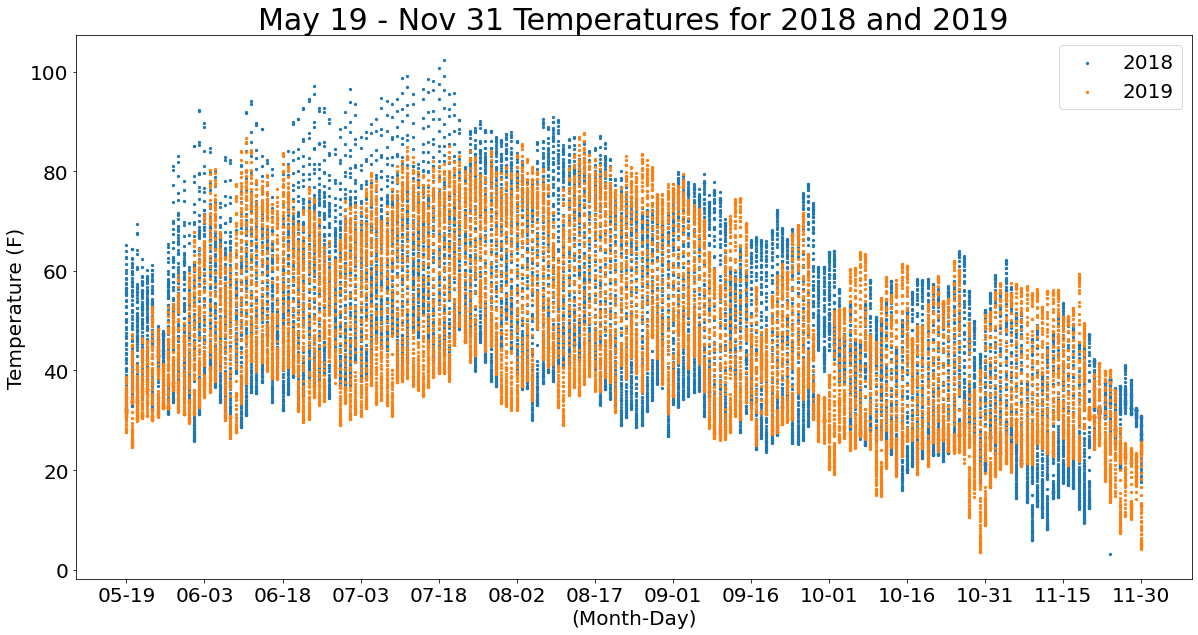

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(may_nov_2018['DT'].dt.strftime('%m-%d'), may_nov_2018['Temperature (F)'], label='2018', s=5)
ax.scatter(may_nov_2019['DT'].dt.strftime('%m-%d'), may_nov_2019['Temperature (F)'], label='2019', s=5)
ax.legend(prop={'size': 20})
ax.set_title('May 19 - Nov 31 Temperatures for 2018 and 2019', size=30)
ax.set_xlabel('(Month-Day)', size=20)
ax.set_ylabel('Temperature (F)', size=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
plt.show()

### Comparing to Temperature Data from Field Station

In [10]:
# Importing Data
station = pd.read_csv('data/Dendra Download.csv')
station

,local_date_time,sagehen_creek_air_speed_meterpersecond,sagehen_creek_air_speed_meterpersecond.1,sagehen_creek_average_air_barometricpressure_millibar,sagehen_creek_average_air_direction_degreeangle,sagehen_creek_average_air_direction_degreeangle.1,sagehen_creek_average_air_relativehumidity_percent,sagehen_creek_average_air_speed_meterpersecond,sagehen_creek_average_air_speed_meterpersecond.1,sagehen_creek_average_air_temperature_degreecelsius,...,sagehen_creek_precipitation_height_hertz,sagehen_creek_precipitation_height_hertz.1,sagehen_creek_precipitation_height_millimeter,sagehen_creek_precipitation_height_millimeter.1,sagehen_creek_snow_depth_inch,sagehen_creek_snow_depth_inch.1,sagehen_creek_snow_depth_inch.2,sagehen_creek_snow_depth_inch.3,sagehen_creek_standarddeviation_air_direction_degreeangle,sagehen_creek_standarddeviation_air_direction_degreeangle.1
0,11/1/2017 12:00,0.671,1.227,NaN,109.3,90.3,27.31,1.457,1.013,17.28,...,0.0,0.254,-72.41,NaN,NaN,NaN,NaN,-82.24,NaN,47.09
1,11/1/2017 12:10,0.329,0.703,NaN,178.5,161.4,26.25,1.306,0.816,17.72,...,0.0,0.282,-72.41,NaN,NaN,NaN,NaN,-92.80,NaN,62.54
2,11/1/2017 12:20,0.452,0.654,NaN,300.7,272.1,25.63,0.938,0.596,17.67,...,0.0,0.338,-72.41,NaN,NaN,NaN,NaN,-90.67,NaN,39.07
3,11/1/2017 12:30,0.507,2.117,NaN,271.7,259.2,22.38,2.341,0.700,18.18,...,0.0,0.252,-72.41,NaN,NaN,NaN,NaN,-78.40,NaN,42.15
4,11/1/2017 12:40,0.878,3.417,NaN,258.7,234.4,22.50,3.586,1.185,18.00,...,0.0,0.212,-72.41,NaN,NaN,NaN,NaN,-84.60,NaN,41.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112611,12/31/2019 23:10,NaN,0.878,NaN,266.4,NaN,NaN,0.980,NaN,NaN,...,1883.4,0.194,194.30,NaN,-9999.0,-9999.0,-9999.0,423.70,NaN,NaN
112612,12/31/2019 23:20,NaN,0.666,NaN,290.7,NaN,NaN,0.813,NaN,NaN,...,1883.5,0.164,194.30,NaN,-9999.0,-9999.0,-9999.0,422.70,NaN,NaN
112613,12/31/2019 23:30,NaN,0.688,NaN,260.0,NaN,NaN,0.812,NaN,NaN,...,1883.5,0.155,194.30,NaN,-9999.0,-9999.0,-9999.0,424.70,NaN,NaN
112614,12/31/2019 23:40,NaN,1.504,NaN,263.0,NaN,NaN,1.612,NaN,NaN,...,1883.4,0.173,194.30,NaN,-9999.0,-9999.0,-9999.0,424.70,NaN,NaN


In [11]:
# Selecting only date/time and temperature data
station = station[['local_date_time', 'sagehen_creek_average_air_temperature_degreecelsius']]

# Cleaning up column names
station.rename({'local_date_time':'DT', 'sagehen_creek_average_air_temperature_degreecelsius': 'Temperature (F)'}, axis=1, inplace=True)

# Converting Celsius to Fahrenheit
station.loc[:, 'Temperature (F)'] = station.loc[:, 'Temperature (F)'] * 1.8 + 32

# Converting Date/Time column to DT objects
station['DT'] = pd.to_datetime(station['DT'])

station

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-11-0b4ad506f271>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

,DT,Temperature (F)
0,2017-11-01 12:00:00,63.104
1,2017-11-01 12:10:00,63.896
2,2017-11-01 12:20:00,63.806
3,2017-11-01 12:30:00,64.724
4,2017-11-01 12:40:00,64.400
...,...,...
112611,2019-12-31 23:10:00,NaN
112612,2019-12-31 23:20:00,NaN
112613,2019-12-31 23:30:00,NaN
112614,2019-12-31 23:40:00,NaN


#### Null Values start on April 24th 2018, before the data starts for the HOBO logger

In [12]:
station.iloc[23860:23870]

,DT,Temperature (F)
23860,2018-04-24 15:20:00,68.054
23861,2018-04-24 15:30:00,67.748
23862,2018-04-24 15:40:00,67.370
23863,2018-04-24 15:50:00,67.820
23864,2018-04-24 16:00:00,NaN
23865,2018-04-24 16:10:00,NaN
23866,2018-04-24 16:20:00,NaN
23867,2018-04-24 16:30:00,NaN
23868,2018-04-24 16:40:00,NaN
23869,2018-04-24 16:50:00,NaN


### Preliminary Plotting

Text(0.5, 1.0, 'Full Temperature Plot of Dendra Data (Messy)')

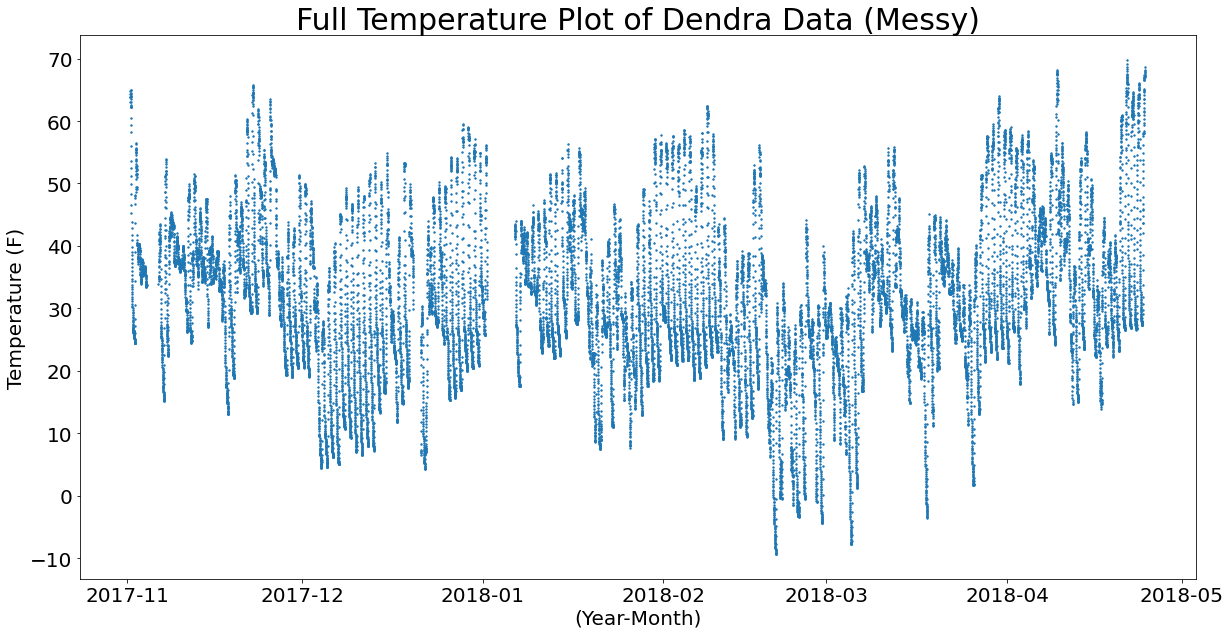

In [13]:
# Plotting Full Temperature Scatterplot
plt.figure(figsize=(20, 10))
plt.scatter(station['DT'], station['Temperature (F)'], s=2)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('(Year-Month)', size=20)
plt.ylabel('Temperature (F)', size=20)
plt.title('Full Temperature Plot of Dendra Data (Messy)', size=30)

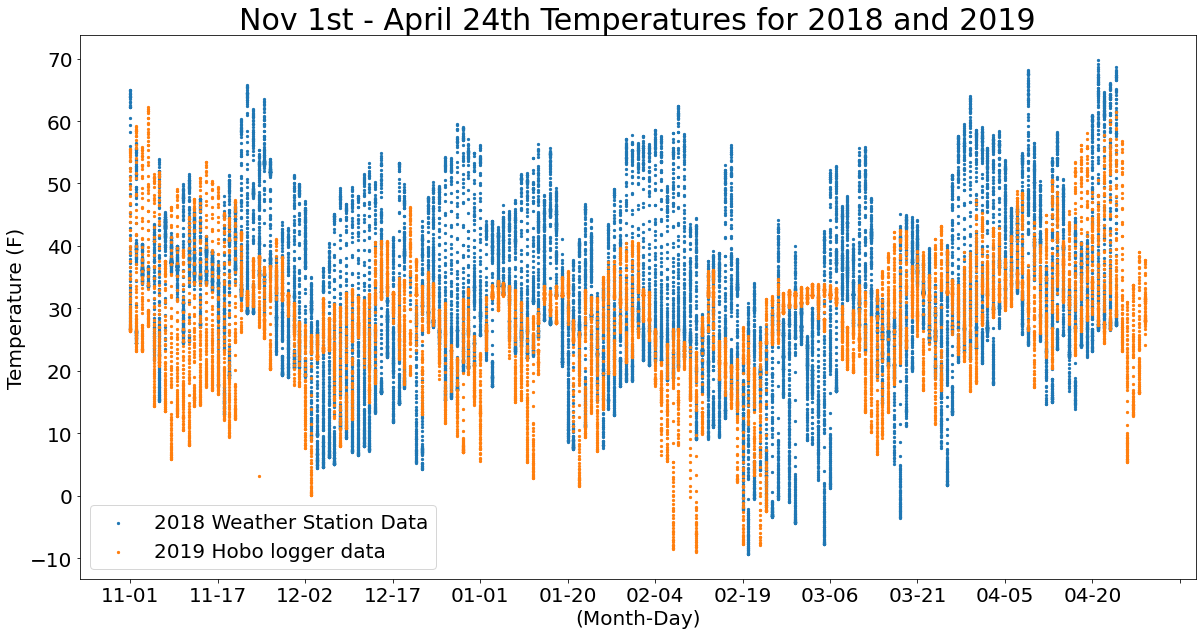

In [14]:
station_nov_april_2018 = station.iloc[:23864]
hobo_nov_april_2019 = complete.loc[(complete['DT'].dt.strftime('%y-%m-%d') >= '18-11-01') & (complete['DT'].dt.strftime('%y-%m-%d') <= '19-04-24')]
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(station_nov_april_2018['DT'].dt.strftime('%m-%d'), station_nov_april_2018['Temperature (F)'], label='2018 Weather Station Data', s=5)
ax.scatter(hobo_nov_april_2019['DT'].dt.strftime('%m-%d'), hobo_nov_april_2019['Temperature (F)'], label='2019 Hobo logger data', s=5)
ax.legend(prop={'size': 20})
ax.set_title('Nov 1st - April 24th Temperatures for 2018 and 2019', size=30)
ax.set_xlabel('(Month-Day)', size=20)
ax.set_ylabel('Temperature (F)', size=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
plt.show()

### Looking at Kirchner et al. Data

In [15]:
kirchner = pd.read_csv('data/kirchner_et_all.txt', sep='\t')
kirchner

,date_time_30min_ended,decimal_year,water_year,year,month,date,hour_of_day,day_of_year,solar_flux_W/m2,air_temp_C,...,Kiln_Creek_stage_mm,South_Trib_1_stage_mm,South_Trib_2_stage_mm,Independence_01_stage_mm,Independence_02_stage_mm,Independence_04_stage_mm,USGS_gage_ht_mm,USGS_discharge_m3/s,USGS_stream_temp_C,USGS_EC_uS/cm
0,2005-10-01 00:00,2005.747945,2006,2005,10,2005-10-01,0.0,274.000000,0.0,13.790000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05664,NaN,NaN
1,2005-10-01 00:30,2005.748002,2006,2005,10,2005-10-01,0.5,274.020833,0.0,13.033333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05664,NaN,NaN
2,2005-10-01 01:00,2005.748059,2006,2005,10,2005-10-01,1.0,274.041667,0.0,12.283333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05664,NaN,NaN
3,2005-10-01 01:30,2005.748116,2006,2005,10,2005-10-01,1.5,274.062500,0.0,11.216667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05664,NaN,NaN
4,2005-10-01 02:00,2005.748174,2006,2005,10,2005-10-01,2.0,274.083333,0.0,9.210000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05664,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,2008-09-30 21:30,2008.748349,2008,2008,9,2008-09-30,21.5,274.895833,0.0,7.237667,...,NaN,NaN,NaN,225.67165,209.6886,238.93425,457.2,0.04248,8.75,145.0
52604,2008-09-30 22:00,2008.748406,2008,2008,9,2008-09-30,22.0,274.916667,0.0,6.332333,...,NaN,NaN,NaN,225.67165,210.2714,238.61900,457.2,0.04248,8.60,145.0
52605,2008-09-30 22:30,2008.748463,2008,2008,9,2008-09-30,22.5,274.937500,0.0,5.569000,...,NaN,NaN,NaN,225.17165,210.2714,238.61900,457.2,0.04248,8.45,145.0
52606,2008-09-30 23:00,2008.748520,2008,2008,9,2008-09-30,23.0,274.958333,0.0,4.946333,...,NaN,NaN,NaN,225.17165,210.8542,238.61900,457.2,0.04248,8.30,145.0


#### Cleaning

In [16]:
# Select only columns needed
kirchner = kirchner.loc[:, ['date_time_30min_ended', 'air_temp_C']].rename({'date_time_30min_ended':'DT'}, axis=1)

# Convert to Fahrenheit
kirchner.loc[:, 'Temperature (F)'] = kirchner.loc[:, 'air_temp_C'] * 1.8 + 32
kirchner.drop('air_temp_C', axis=1, inplace=True)

# Converting to Datetime objects
kirchner['DT'] = pd.to_datetime(kirchner['DT'])

kirchner

,DT,Temperature (F)
0,2005-10-01 00:00:00,56.8220
1,2005-10-01 00:30:00,55.4600
2,2005-10-01 01:00:00,54.1100
3,2005-10-01 01:30:00,52.1900
4,2005-10-01 02:00:00,48.5780
...,...,...
52603,2008-09-30 21:30:00,45.0278
52604,2008-09-30 22:00:00,43.3982
52605,2008-09-30 22:30:00,42.0242
52606,2008-09-30 23:00:00,40.9034


Text(0.5, 1.0, 'Full Temperature Plot of Kirchner et al. Data (Messy)')

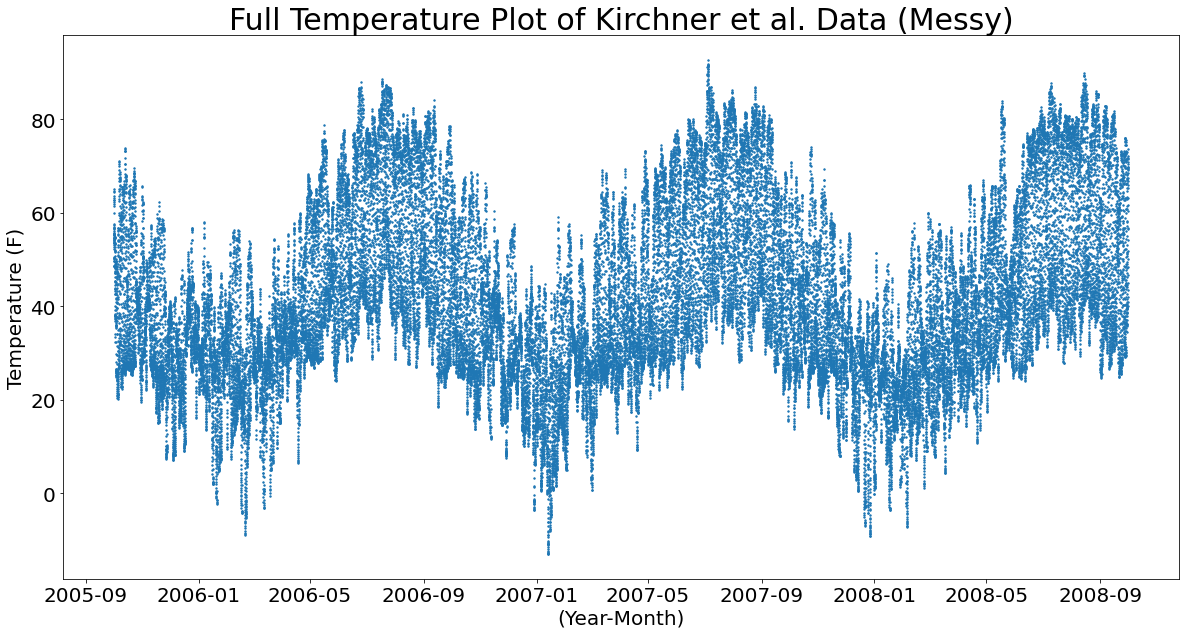

In [17]:
# Plotting Full Temperature Scatterplot
plt.figure(figsize=(20, 10))
plt.scatter(kirchner['DT'], kirchner['Temperature (F)'], s=2)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('(Year-Month)', size=20)
plt.ylabel('Temperature (F)', size=20)
plt.title('Full Temperature Plot of Kirchner et al. Data (Messy)', size=30)